<h1 style="text-align: center;">CS3802 Machine Learning Algorithms Lab : Ex 8</h1>
<h2 style="text-align: center;">21011102079</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv(r"D:\snu\academic\Sem6\ML_Lab\Lab8\train\train.csv")

In [3]:
label = df['label']
df.drop('label', axis = 1, inplace = True)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df.shape

(42000, 784)

In [5]:
covar_mat = np.matmul(std_df.T, std_df)
covar_mat.shape

(784, 784)

In [6]:
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)

Dimensions of Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


C:\Users\rsath\AppData\Local\Temp\ipykernel_6736\2763939472.py:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_mat, eigvals = (782, 783))


In [7]:
final_df = np.matmul(vectors, std_df.T)
print("vectros:", vectors.shape, "n", "std_df:", std_df.T.shape, "n", "final_df:", final_df.shape)

vectros: (2, 784) n std_df: (784, 42000) n final_df: (2, 42000)


In [8]:
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

pca_1      pca_2  label
0     -5.226445  -5.140478    1.0
1      6.032996  19.292332    0.0
2     -1.705813  -7.644503    1.0
3      5.836139  -0.474207    4.0
4      6.024818  26.559574    0.0
...         ...        ...    ...
41995 -1.350366  13.678849    0.0
41996 -1.187360  -8.869582    1.0
41997  7.076277   0.495391    7.0
41998 -4.344513   2.307240    6.0
41999  1.559121  -4.807670    9.0

[42000 rows x 3 columns]

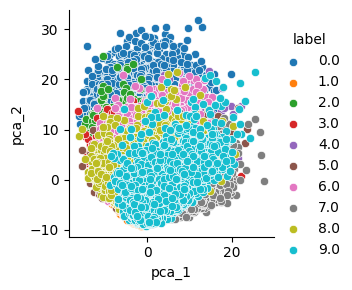

In [9]:
sns.FacetGrid(dataFrame, hue = 'label',  ) \
  .map(sns.scatterplot, 'pca_1', 'pca_2') \
  .add_legend()
plt.show()
